# Sujet 2 : le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import urllib.request

Le but de ce notebook est de revenir sur les travaux de __William Playfair__. Plus précisément, nous nous attarderons sur [ce graphe](https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png). 

## Exercice 1: Reproduction des résultats

A partir du [fichier csv](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv) contenant les données obtenues par numérisation du graphe de Playfair, l'objectif de cette partie est de produire un graphe similaire à celui présenté lors de l'introduction de ce notebook.

Rien ne garantit que l'URL utilisée reste toujours valable. Nous avons fait une copie des données en local, puis nous avons utilisé cette copie pour les calculs.

In [32]:
f = "local.csv"
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"

if not os.path.exists(f):
    urllib.request.urlretrieve(url, f)

In [33]:
df = pd.read_csv(f, index_col=0)

Voici une description des données dans ce fichier CSV.

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| rownames           | Identifiant de ligne       |
| Year      | Année de mesure     |
| Wheat            | Prix du blé  |
| Wages        |  Salaire moyen |         

__Notes importantes:__
* Le prix du blé et le salaire moyen est donné en _shillings_.
* Jusqu'en 1971, la livre sterling était divisée en 20 shillings, et un shilling en 12 pences.
* Le prix du blé est donné en shillings pour un quart de boisseau de blé. Un quart de boisseau équivaut 15 livres britanniques ou 6,8 kg.
* Les salaires sont donnés en shillings par semaine.

Nous allons maintenant recréer le graphe de Playfair. Tout comme sur le graphe d'origine, le prix du blé sera représenté par des barres noires  et les salaires par une surface bleue délimitée par une courbe rouge.

__Notes importantes:__
* Les données dans le fichier csv vont de *1565* à *1821*, chaque ligne représentant un écart de 5 ans avec la précédente hormis la dernière ligne représentant un écart d'un an.
* Le graphe présentera les résultats depuis *1565* jusqu'à *1830*, afin de ressembler le plus possible au graphe d'origine.
* Dans le fichier csv ainsi que dans le graphe d'origine, les valeurs du salaire moyen hebdomadaire ne sont pas disponibles pour les années 1815, 1820 et 1821. La ligne de code ``` salaire_non_nuls = df.dropna(subset=['Wages']) ``` est utilisée pour palier à ce problème.

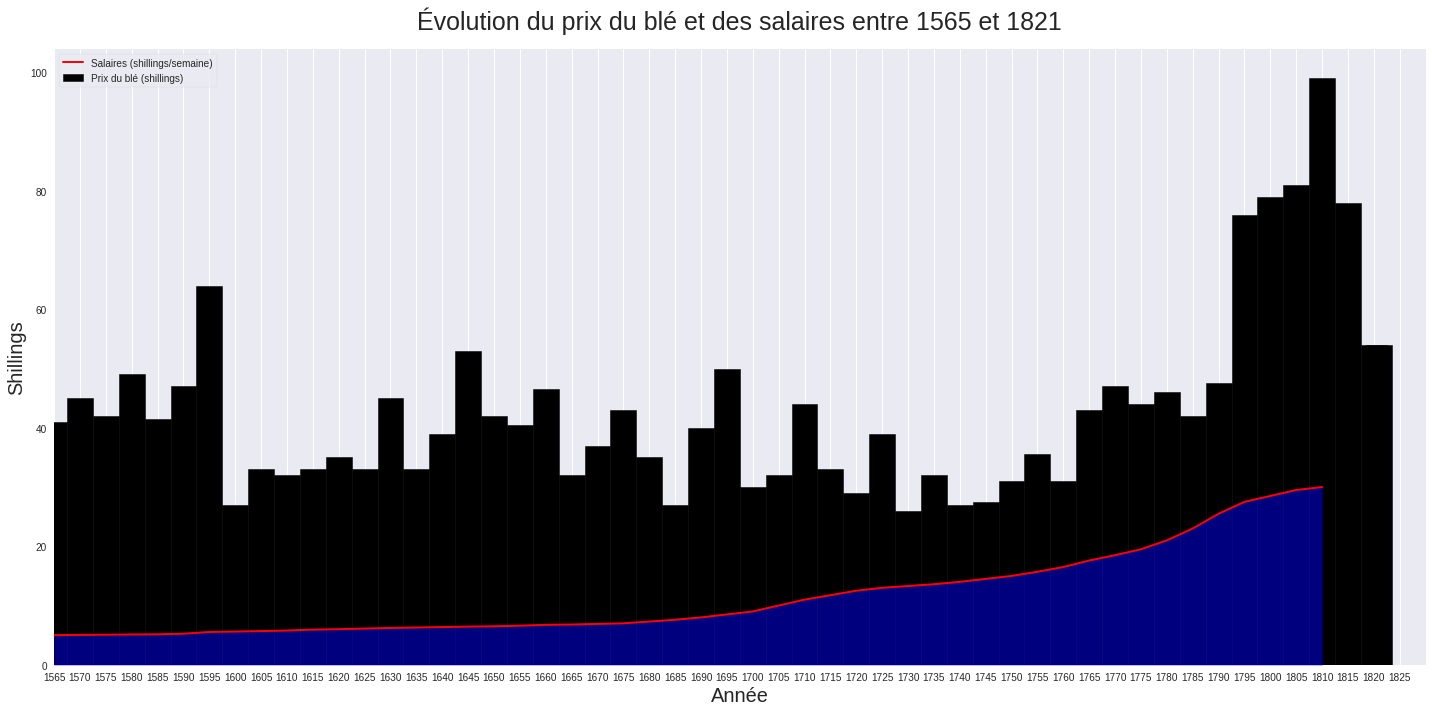

In [43]:
# Définition du graphe
plt.style.use('seaborn')
plt.figure(figsize=(20, 10))

# Représentation du prix du blé par des barres noires
plt.bar(
    df['Year'], 
    df['Wheat'], 
    width=5, 
    color='black', 
    edgecolor='black',
    linewidth=0.5,
    label='Prix du blé (shillings)',
    zorder=1
)

# Suppression des salaires nuls
salaire_non_nuls = df.dropna(subset=['Wages'])

# Représentation de la surface bleue
plt.fill_between(
    salaire_non_nuls['Year'], 
    salaire_non_nuls['Wages'], 
    color='blue', 
    alpha=0.5,
    zorder=2
)

# Représentation du salaire moyen hebdomadaire par une courbe rouge, délimitant la surface bleue
plt.plot(
    salaire_non_nuls['Year'], 
    salaire_non_nuls['Wages'], 
    color='red', 
    linewidth=2,
    label='Salaires (shillings/semaine)',
    zorder=3
)

# Ajout de la légende
plt.title("Évolution du prix du blé et des salaires entre 1565 et 1821", fontsize=25, pad=20)
plt.xlabel("Année", fontsize=20)
plt.ylabel("Shillings", fontsize=20)
plt.xticks(range(1565, 1830, 5))
plt.xlim(1565, 1830)
plt.grid(axis='y')
plt.legend(frameon=True) 

# Affichage du graphe
plt.tight_layout()
plt.show()